## 1. Udforsk datasættet

**Formål**: 
- Indlæse scikit-learn's Breast Cancer-datasæt
- Lave en kort data-udforskning

**Spørgsmål**:
- Hvad indeholder datasættet?
- Hvor mange features er der?
- Hvordan er fordelingen af target-variablen?


In [2]:
# ========== Code Cell for Step 1 ==========

# Relevant imports
import pandas as pd
from sklearn.datasets import load_breast_cancer

# 1. Udforsk datasættet
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

print("\n--- HEAD ---")
print(df.head())
print("\n--- SHAPE ---")
print(df.shape)
print("\n--- DESCRIBE ---")
print(df.describe())
print("\n--- TARGET NAMES ---")
print(data.target_names)



--- HEAD ---
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  

## 2. Indlæs og vis datasættet (console print)
**Formål**: 
- Se hele datasættet (evt. i konsollen eller i notebooks output)


In [3]:
# ========== Code Cell for Step 2 ==========

print("\n--- FULL DATAFRAME ---")
print(df)



--- FULL DATAFRAME ---
     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  

## 3. Linear Regression på 15 rækker

**Formål**:
- Eksperiment med lineær regression på et lille subset af data (15 rækker).
- Brug den første feature som target (y_lin) blot som eksempel.


In [4]:
# ========== Code Cell for Step 3 ==========

from sklearn.linear_model import LinearRegression

X_lin = data.data[:15, :]
y_lin = data.data[:15, 0]
lin_model = LinearRegression()
lin_model.fit(X_lin, y_lin)
print("\nLinear Regression koefficienter:", lin_model.coef_)



Linear Regression koefficienter: [ 7.96494840e-01  9.17803048e-03  1.61409956e-02  7.14861868e-04
 -1.10814561e-01 -1.76912879e-01 -1.31022870e-01 -8.77769713e-02
 -1.23092613e-01 -4.62702448e-02 -4.95479109e-02  3.28769373e-02
 -3.31696377e-02  2.00503405e-03  5.69880539e-03  3.45258262e-02
  7.13277659e-02  9.83869831e-03  4.76487972e-02 -2.39780602e-03
  2.25396844e-02 -5.09091076e-03  1.31868264e-03 -1.22976435e-04
 -1.38315758e-01  1.43045605e-02  1.09898120e-03 -2.01985968e-01
 -8.74843582e-04 -4.47866967e-02]


## 4. Eksperimenter med `test_size` og `random_state`

**Formål**:
- Opdel data i trænings- og test-sæt med forskellige `test_size` og `random_state`.
- Her er et eksempel med `test_size=0.4` og `random_state=1`.


In [5]:
# ========== Code Cell for Step 4 ==========

from sklearn.model_selection import train_test_split

X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1
)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (341, 30)
X_test shape: (228, 30)
y_train shape: (341,)
y_test shape: (228,)


## 5. Logistic Regression

**Formål**:
- Træn en simpel logistisk regression og se hvor god den er.
- Se, om accuracy stiger eller falder ved forskellige hyperparametre.


In [6]:
# ========== Code Cell for Step 5 ==========

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_model = LogisticRegression(max_iter=10000)
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print("\nLogistic Regression Accuracy:", accuracy_score(y_test, y_pred))



Logistic Regression Accuracy: 0.9298245614035088


-----------------------------------------------------------------------------------------------------------------------------------------------------

## 6. Evaluer med `accuracy_score`


In [7]:
# ========== Code Cell for Step 6 ==========

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))



Accuracy Score: 0.9298245614035088


## 7. Confusion Matrix

**Formål**:
- Se fordelingen af sande/positive, sande/negative, falske/positive og falske/negative.


In [8]:
# ========== Code Cell for Step 7 ==========

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)



Confusion Matrix:
 [[ 70  10]
 [  6 142]]


## 8. Visualiser Confusion Matrix med Heatmap

**Formål**:
- Gør det mere overskueligt med et heatmap.
- Tilpasning af figurstørrelse til 9:16 for at opfylde ønsket format.


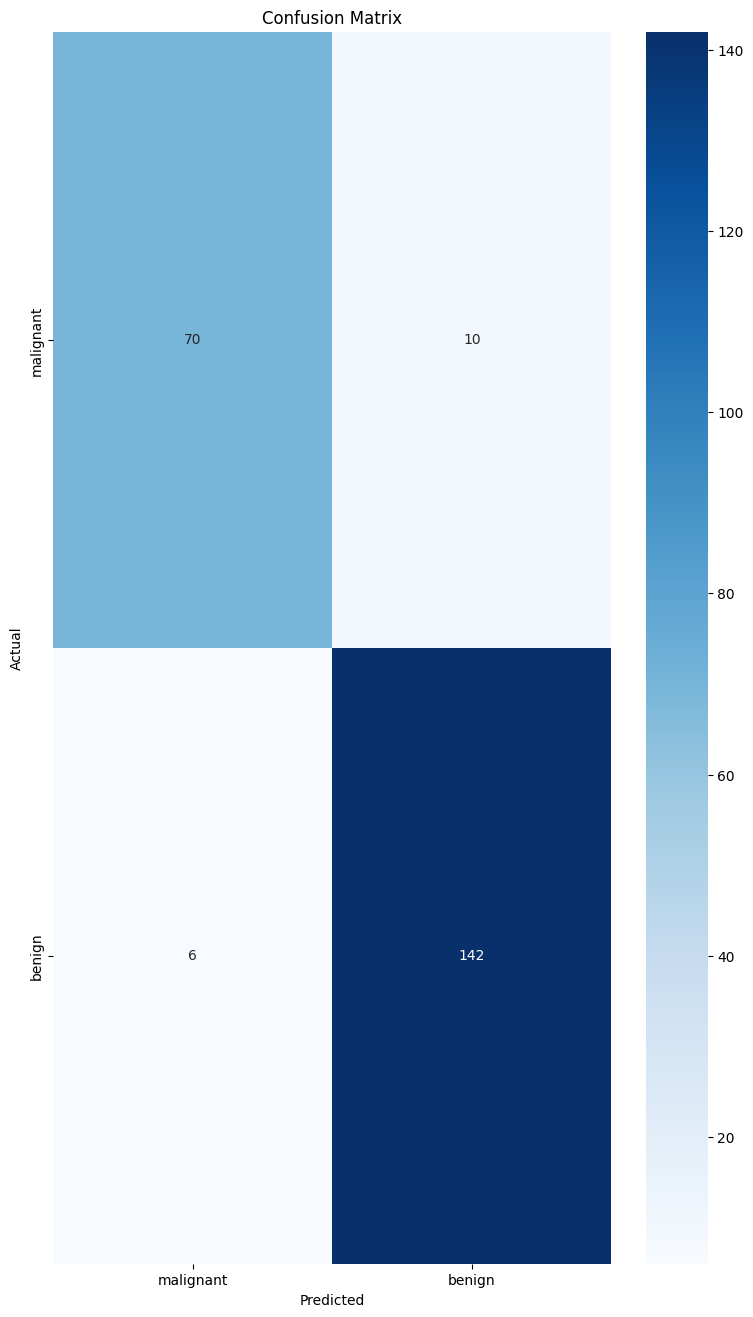

In [11]:
# ========== Code Cell for Step 8 ==========

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9, 16))  # 9:16 aspect ratio
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## 9. DecisionTreeClassifier

**Formål**:
- Træn et beslutningstræ og evaluer dets accuracy.


In [12]:
# ========== Code Cell for Step 9 ==========

from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(max_depth=4)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

print("\nDecision Tree Accuracy:", accuracy_score(y_test, dt_pred))



Decision Tree Accuracy: 0.9166666666666666


## 10. Visualiser Beslutningstræet

**Formål**:
- Se det trænede træ's struktur.
- Her anvender vi `plot_tree` fra sklearn.


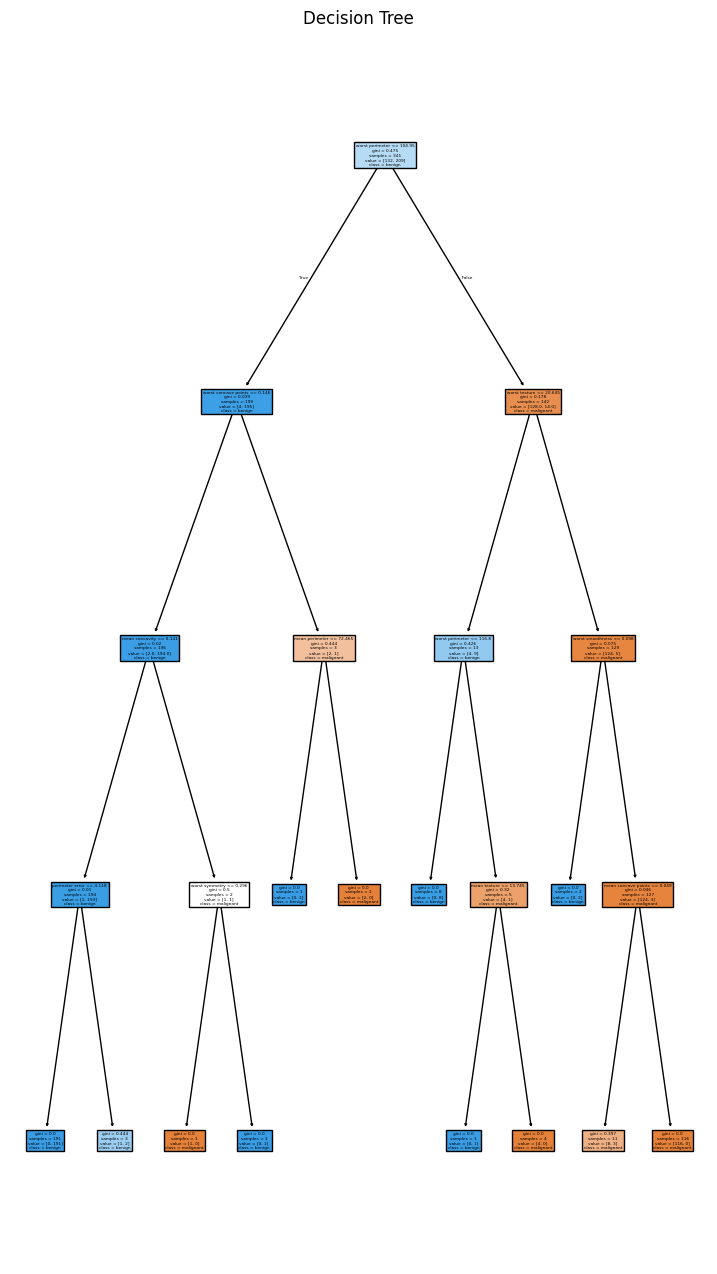

In [13]:
# ========== Code Cell for Step 10 ==========

from sklearn.tree import plot_tree

plt.figure(figsize=(9, 16))  # 9:16 aspect ratio
plot_tree(dt_model, 
          feature_names=data.feature_names,
          class_names=data.target_names,
          filled=True)
plt.title("Decision Tree")
plt.show()


## 11. Precision, Recall, F1-score

**Formål**:
- Få indsigt i andre performance-mål udover accuracy.


In [14]:
# ========== Code Cell for Step 11 ==========

from sklearn.metrics import precision_score, recall_score, f1_score

print("\nPrecision:", precision_score(y_test, dt_pred))
print("Recall:", recall_score(y_test, dt_pred))
print("F1-score:", f1_score(y_test, dt_pred))



Precision: 0.9448275862068966
Recall: 0.9256756756756757
F1-score: 0.9351535836177475


## 12. Diskussion

- **Precision** er vigtig, når man vil undgå falske positiver, fx spam-filtrering.
- **Recall** er vigtig, når man vil minimere falske negativer, fx sygdomsdiagnoser.


## 13. Cross-validation (5-fold)

**Formål**:
- Undersøg modelstabilitet ved at køre 5-fold cross-validation på Decision Tree.


In [15]:
# ========== Code Cell for Step 13 ==========

from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_model, X, y, cv=5)
print("\nCross-val scores:", scores)
print("Gennemsnitlig score:", scores.mean())



Cross-val scores: [0.92105263 0.89473684 0.93859649 0.94736842 0.90265487]
Gennemsnitlig score: 0.9208818506443098


## 14. Sammenlign DecisionTree og LogisticRegression


In [16]:
# ========== Code Cell for Step 14 ==========

dt_score = accuracy_score(y_test, dt_pred)
log_score = accuracy_score(y_test, y_pred)
print("\nDT vs. Logistic Accuracy:", dt_score, "vs", log_score)



DT vs. Logistic Accuracy: 0.9166666666666666 vs 0.9298245614035088


## 15. ROC-kurve og AUC-score

**Formål**:
- Plot ROC-kurve for Logistic Regression
- Se om modellen ligger over den diagonale baseline (tilfældige gæt).


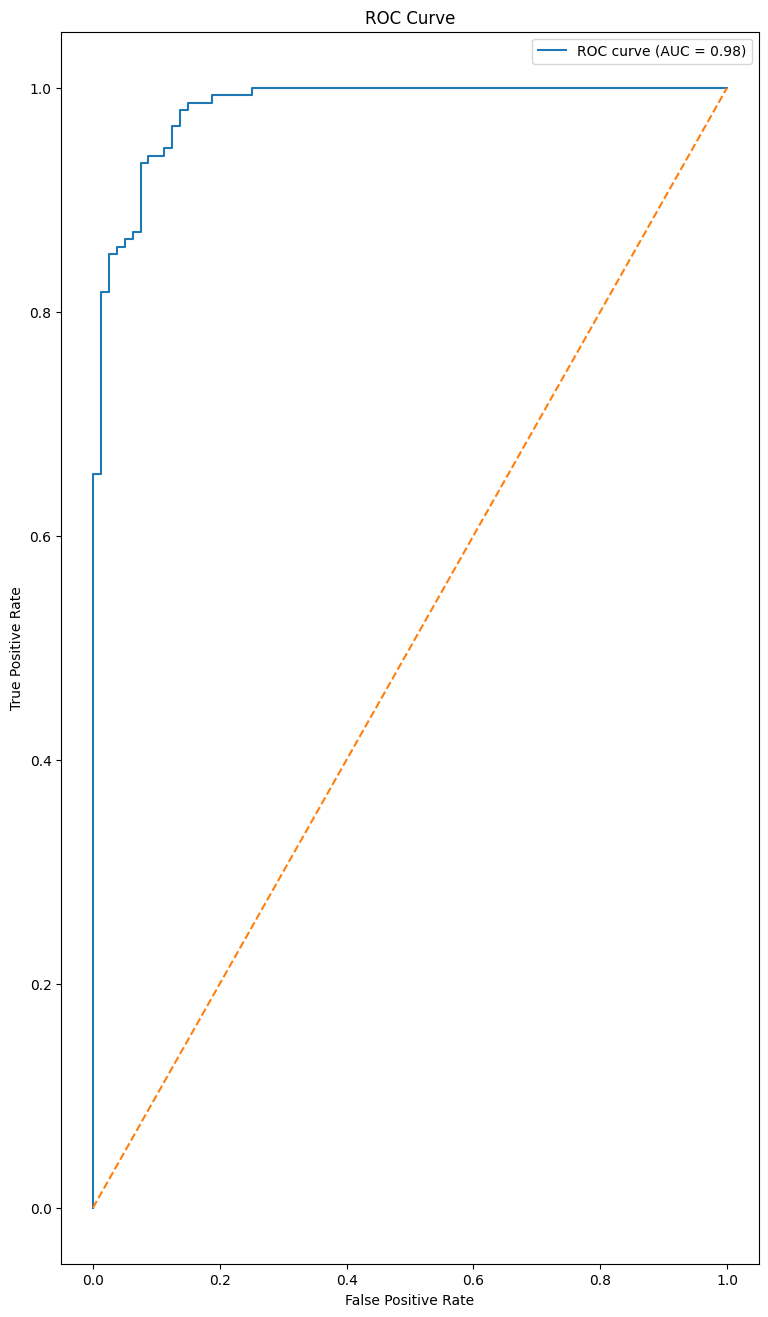

In [17]:
# ========== Code Cell for Step 15 ==========

from sklearn.metrics import roc_curve, auc

log_probs = log_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, log_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(9, 16))  # 9:16 aspect ratio
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


## 16. Tre Logistic Regression modeller med forskellige penalty


In [18]:
# ========== Code Cell for Step 16 ==========

log_none = LogisticRegression(penalty=None, max_iter=10000).fit(X_train, y_train)
log_l1 = LogisticRegression(penalty="l1", solver="liblinear", max_iter=10000).fit(X_train, y_train)
log_l2 = LogisticRegression(penalty="l2", max_iter=10000).fit(X_train, y_train)

print("\nL1 weights:", log_l1.coef_)
print("L2 weights:", log_l2.coef_)


c:\Users\nour\PitFinderProjekt\env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



L1 weights: [[ 2.55041869e+00  1.66251809e-02 -8.62710963e-03 -2.10740280e-04
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -3.14731455e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.76329364e+00 -1.57276677e-01 -3.42759534e-01 -2.70105510e-02
   0.00000000e+00  0.00000000e+00 -7.23318540e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
L2 weights: [[ 0.19347501  0.05146656 -0.2010694   0.03891717 -0.0576385  -0.05488035
  -0.1428934  -0.10926426 -0.11880199 -0.00121572 -0.04134633 -0.14531019
   0.24490437 -0.06202167 -0.00785863  0.03385578 -0.00600562 -0.01980997
  -0.01082362  0.00792737  0.04673363 -0.2201841  -0.35437542 -0.01009224
  -0.10538198 -0.14735721 -0.41208212 -0.2411615  -0.18966707 -0.01335925]]


## 17. Visualiser vægtene for L1 og L2


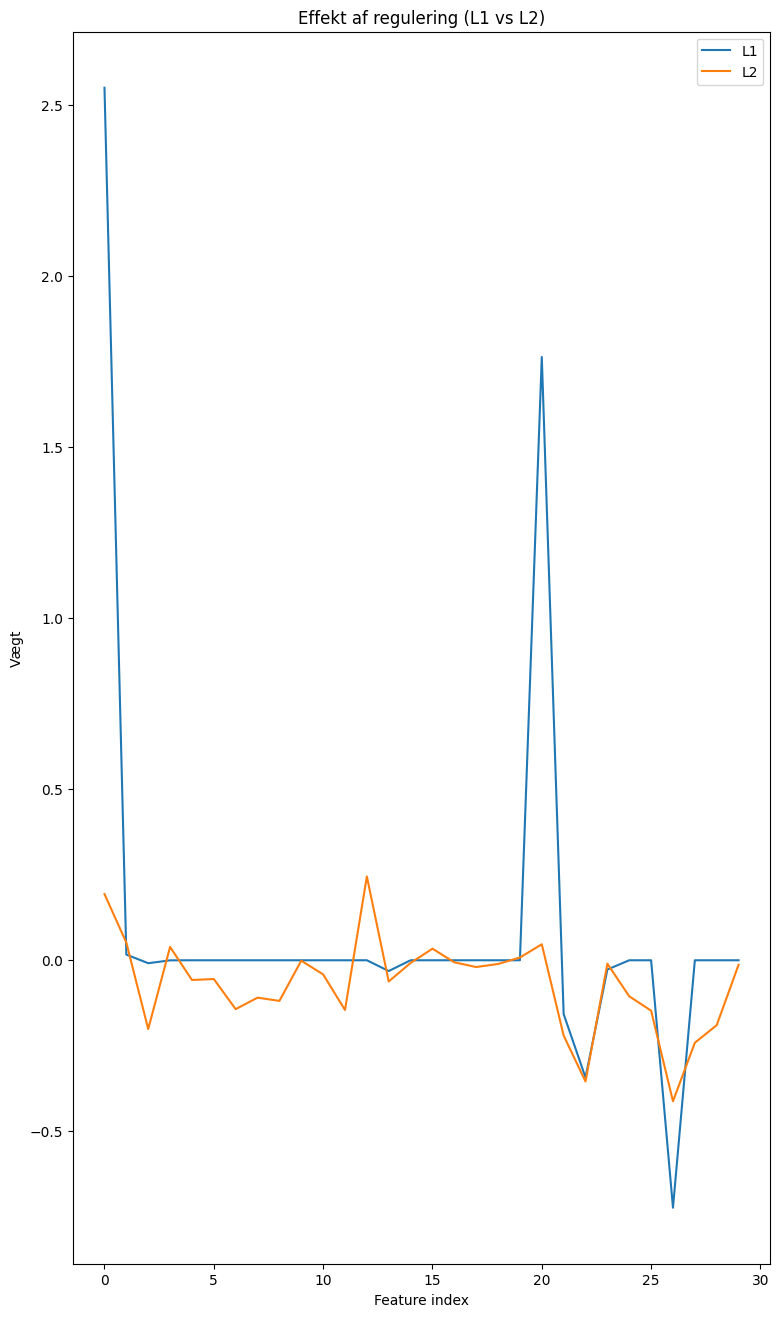

In [19]:
# ========== Code Cell for Step 17 ==========

plt.figure(figsize=(9, 16))  # 9:16 aspect ratio
plt.plot(log_l1.coef_[0], label="L1")
plt.plot(log_l2.coef_[0], label="L2")
plt.legend()
plt.title("Effekt af regulering (L1 vs L2)")
plt.xlabel("Feature index")
plt.ylabel("Vægt")
plt.show()


## 18. GaussianNB-model


In [20]:
# ========== Code Cell for Step 18 ==========

from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
print("\nNaive Bayes Accuracy:", accuracy_score(y_test, nb_pred))



Naive Bayes Accuracy: 0.9429824561403509


## 19. SVC-model med lineær og rbf kerne


In [21]:
# ========== Code Cell for Step 19 ==========

from sklearn.svm import SVC

svc_linear = SVC(kernel="linear", probability=True).fit(X_train, y_train)
svc_rbf = SVC(kernel="rbf", probability=True).fit(X_train, y_train)

print("\nSVC Linear Accuracy:", accuracy_score(y_test, svc_linear.predict(X_test)))
print("SVC RBF Accuracy:", accuracy_score(y_test, svc_rbf.predict(X_test)))



SVC Linear Accuracy: 0.9342105263157895
SVC RBF Accuracy: 0.9166666666666666


## 20. Visualisering af beslutningsgrænse (2 features)

**Formål**:
- Reducér features til 2 (for visualisering)
- Plot beslutningsgrænsen


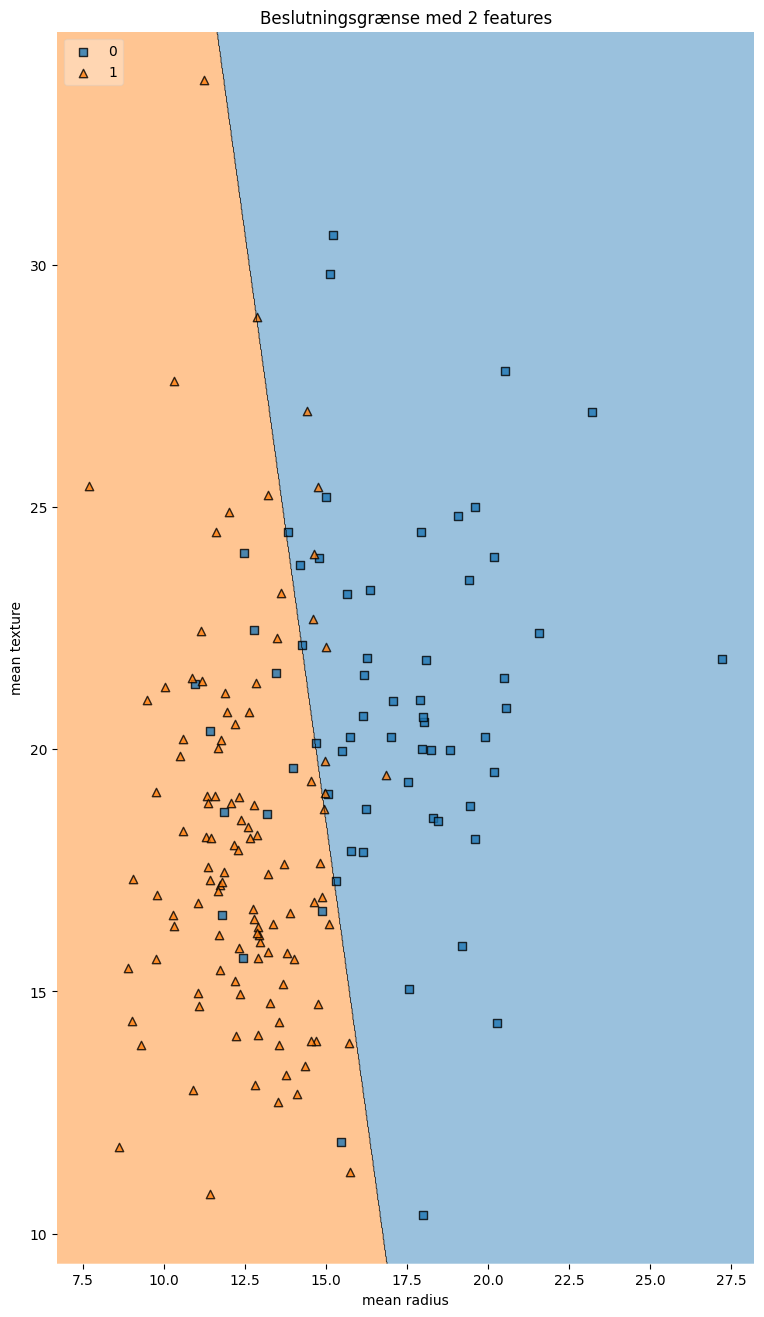

In [23]:
# ========== Code Cell for Step 20 ==========

import numpy as np
from mlxtend.plotting import plot_decision_regions

X_2d = X[:, [0, 1]]
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(
    X_2d, y, test_size=0.3, random_state=1
)

svc_2d = SVC(kernel="linear").fit(X_train_2d, y_train_2d)

plt.figure(figsize=(9, 16))  # 9:16 aspect ratio
plot_decision_regions(X_test_2d, y_test_2d, clf=svc_2d, legend=2)
plt.title("Beslutningsgrænse med 2 features")
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.show()


## 21. RandomForestClassifier


In [24]:
# ========== Code Cell for Step 21 ==========

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier().fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("\nRandom Forest Accuracy:", accuracy_score(y_test, rf_pred))



Random Forest Accuracy: 0.9385964912280702


## 22. BaggingClassifier med DecisionTree


In [25]:
# ========== Code Cell for Step 22 ==========

from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(DecisionTreeClassifier(), n_estimators=10)
bag_model.fit(X_train, y_train)
bag_pred = bag_model.predict(X_test)
print("\nBagging Classifier Accuracy:", accuracy_score(y_test, bag_pred))



Bagging Classifier Accuracy: 0.9078947368421053


## 23. Learning Curves

**Formål**:
- Undersøg hvordan trænings- og test-score ændrer sig med mere data.


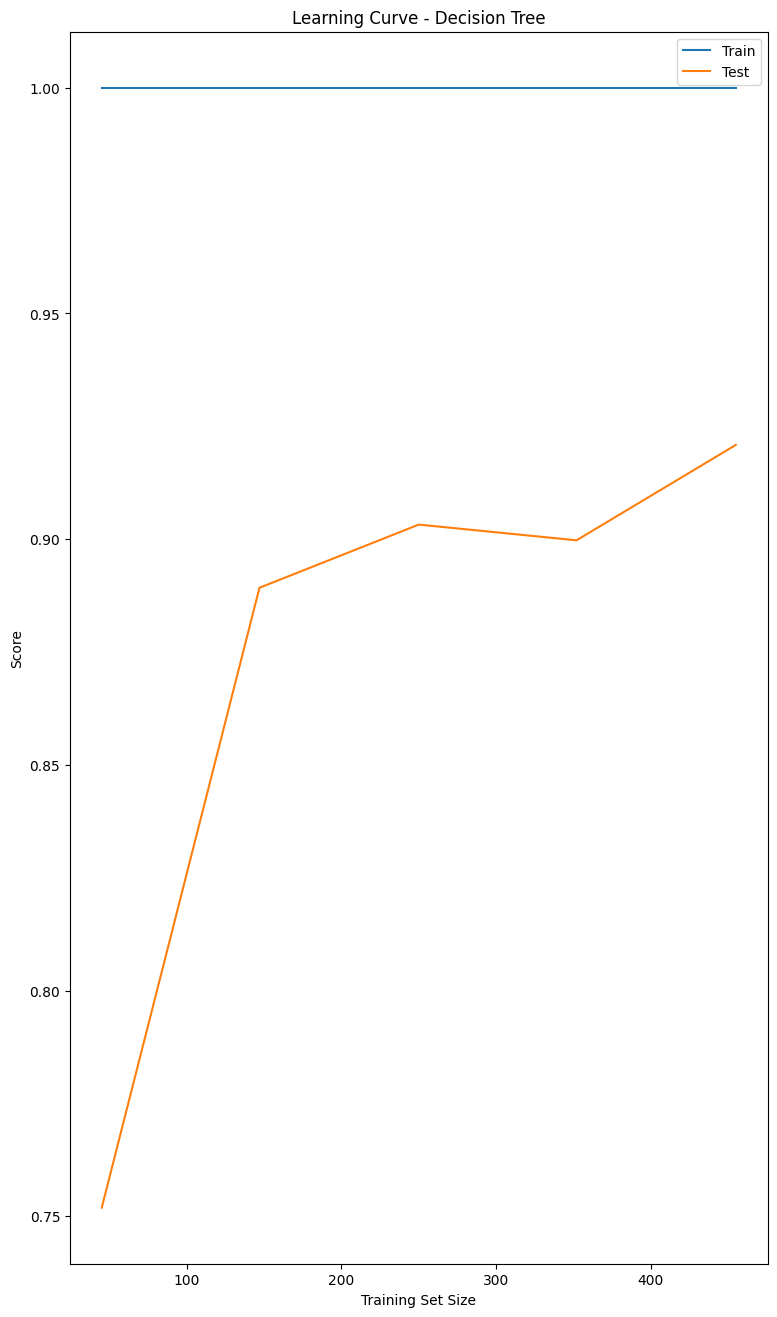

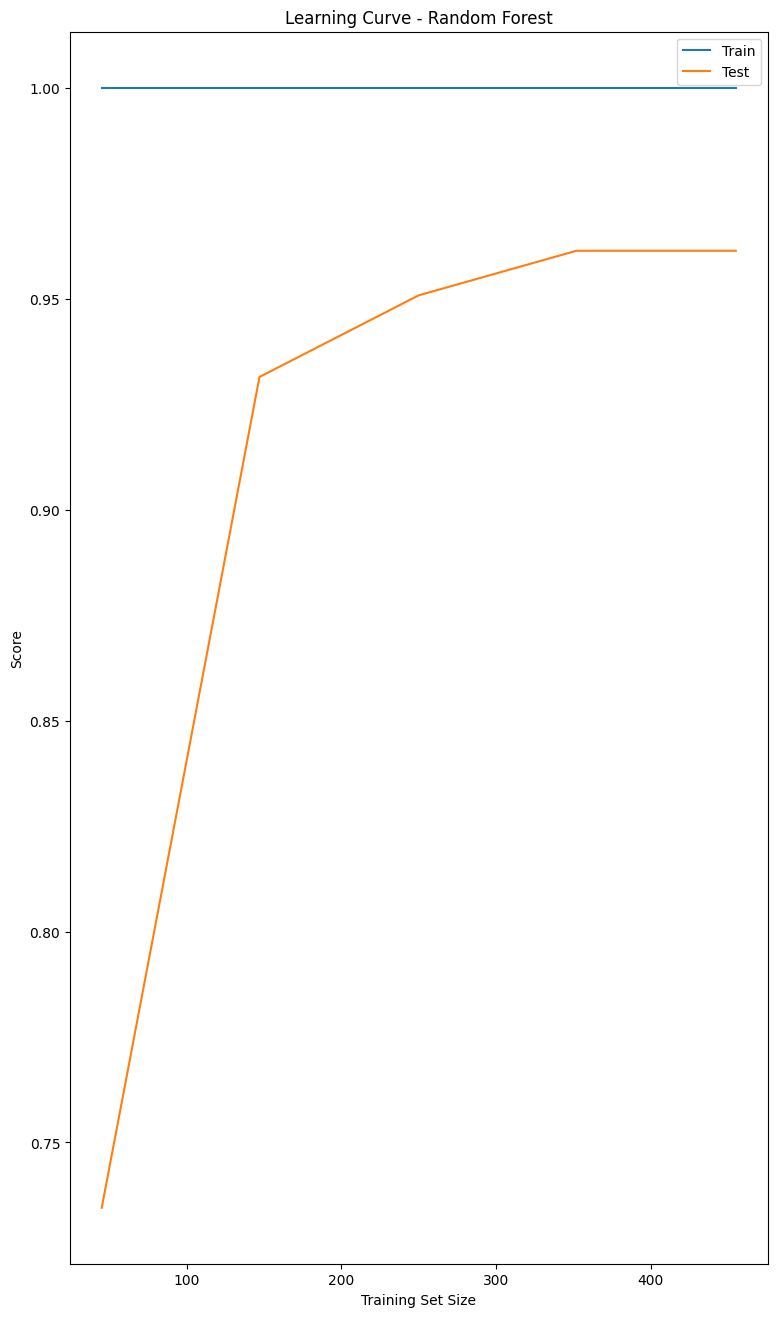

In [26]:
# ========== Code Cell for Step 23 ==========

from sklearn.model_selection import learning_curve

# Decision Tree
train_sizes, train_scores, test_scores = learning_curve(DecisionTreeClassifier(), X, y, cv=5)
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.figure(figsize=(9, 16))  # 9:16 aspect ratio
plt.plot(train_sizes, train_mean, label="Train")
plt.plot(train_sizes, test_mean, label="Test")
plt.title("Learning Curve - Decision Tree")
plt.xlabel("Training Set Size")
plt.ylabel("Score")
plt.legend()
plt.show()

# Random Forest
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), X, y, cv=5)
plt.figure(figsize=(9, 16))  # 9:16 aspect ratio
plt.plot(train_sizes, train_scores.mean(axis=1), label="Train")
plt.plot(train_sizes, test_scores.mean(axis=1), label="Test")
plt.title("Learning Curve - Random Forest")
plt.xlabel("Training Set Size")
plt.ylabel("Score")
plt.legend()
plt.show()


## 24. Bias vs. Variance diskussion

- **Høj max_depth** => Lav bias, høj variance (overfitting).
- **Lav max_depth** => Høj bias, lav variance (underfitting).


## 25. Principal Component Analysis (PCA)

**Formål**:
- Reducere dimensionaliteten af `breast_cancer`-datasættet til 2 komponenter.
- **PCA** fremhæver de retninger i datasættet, hvor der er mest varians.


In [27]:
# ========== Code Cell for Step 25 ==========

import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA

# Indlæs data
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Labels (0 eller 1)

# Udfør PCA med 2 komponenter
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print("Forklaret varians pr. komponent:", pca.explained_variance_ratio_)
print("Total forklaret varians (sum):", pca.explained_variance_ratio_.sum())


Forklaret varians pr. komponent: [0.98204467 0.01617649]
Total forklaret varians (sum): 0.9982211613741727


## 26. Visualisér data i 2D og analyser mængden af bevaret varians

**Formål**:
- Tegn de to PCA-komponenter i et 2D-plot.
- Farvelæg punkterne baseret på, om det er malignant (0) eller benign (1).
- Se, hvor meget af den samlede varians i data, der er fanget i disse to akser.


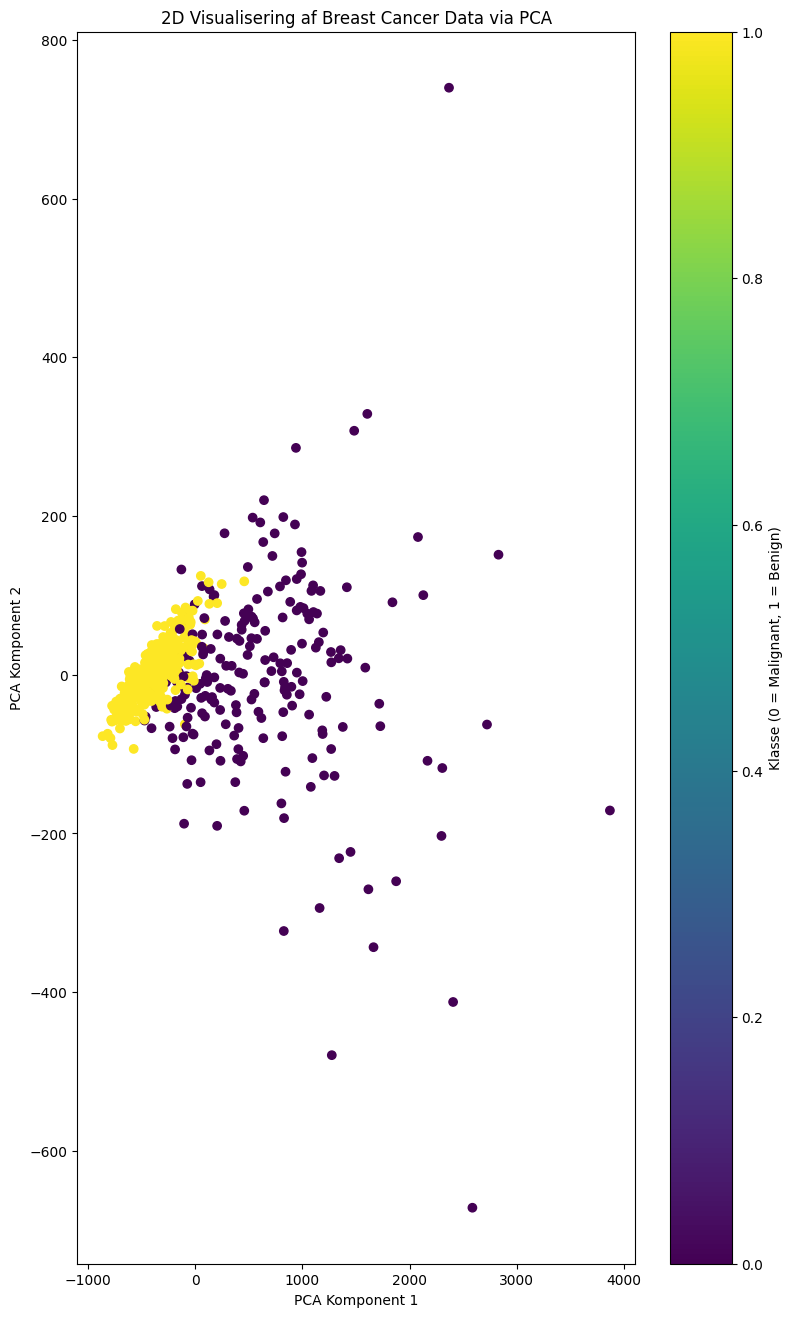

In [28]:
# ========== Code Cell for Step 26 ==========

import matplotlib.pyplot as plt

plt.figure(figsize=(9, 16))  # 9:16 aspect ratio
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel("PCA Komponent 1")
plt.ylabel("PCA Komponent 2")
plt.title("2D Visualisering af Breast Cancer Data via PCA")
plt.colorbar(label="Klasse (0 = Malignant, 1 = Benign)")
plt.show()

# Note:
# pca.explained_variance_ratio_ viser, hvor meget af datasættes varians der fanges
# i hver PCA-komponent. Summen for de første 2 komponenter ligger ofte ret højt.


## 27. Agglomerative Clustering

**Formål**:
- Udfør Agglomerative Clustering på data (2 klynger).
- Sammenlign resultaterne med de faktiske etiketter ved hjælp af en confusion matrix.

**Bemærk**:
- Clustering-metoder navngiver klynger vilkårligt, så klynge "0" betyder ikke nødvendigvis "malignant". Du kan evt. ombytte 0/1 efter fit, hvis du vil matche de sande klasser.


Agglomerative Clustering - Confusion Matrix:
 [[126  86]
 [357   0]]


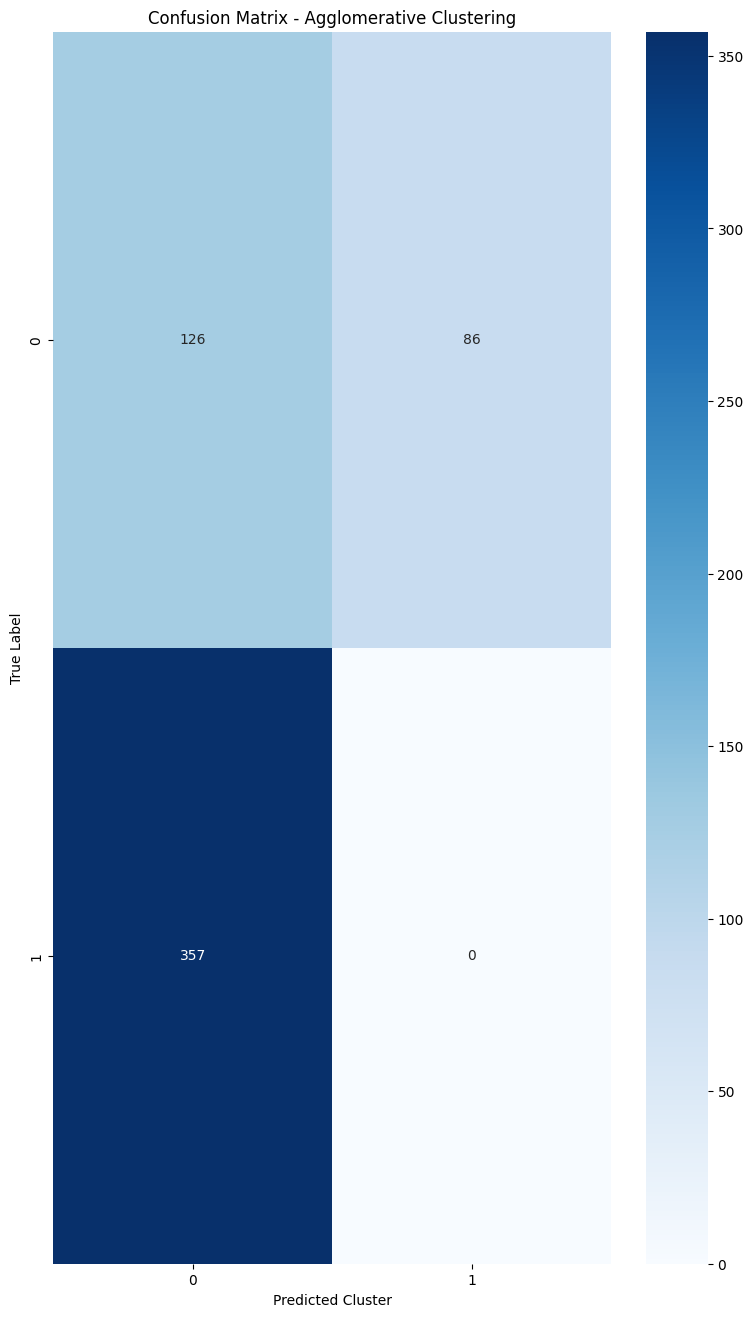

In [29]:
# ========== Code Cell for Step 27 ==========

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import confusion_matrix

# Fit Agglomerative Clustering med 2 klynger
agg_model = AgglomerativeClustering(n_clusters=2)
y_agg = agg_model.fit_predict(X)

# Lav confusion matrix
cm_agg = confusion_matrix(y, y_agg)
print("Agglomerative Clustering - Confusion Matrix:\n", cm_agg)

# Alternativt kan man visualisere med et heatmap
import seaborn as sns

plt.figure(figsize=(9, 16))  # 9:16 aspect ratio
sns.heatmap(cm_agg, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Agglomerative Clustering")
plt.xlabel("Predicted Cluster")
plt.ylabel("True Label")
plt.show()

# Bemærk: Hvis klynge 0 overvejende svarer til benign (1) og klynge 1 til malignant (0),
# kan man evt. ombytte label 0 <-> 1 i y_agg for at få "rigtige" matches i conf. matrix.


## 28. K-Means Clustering og "Elbow Method"

**Formål**:
- Anvend K-Means clustering på `breast_cancer`-datasættet.
- Bestem det optimale antal klynger via “Elbow Method”, hvor man plotter `inertia` for forskellige værdier af k.


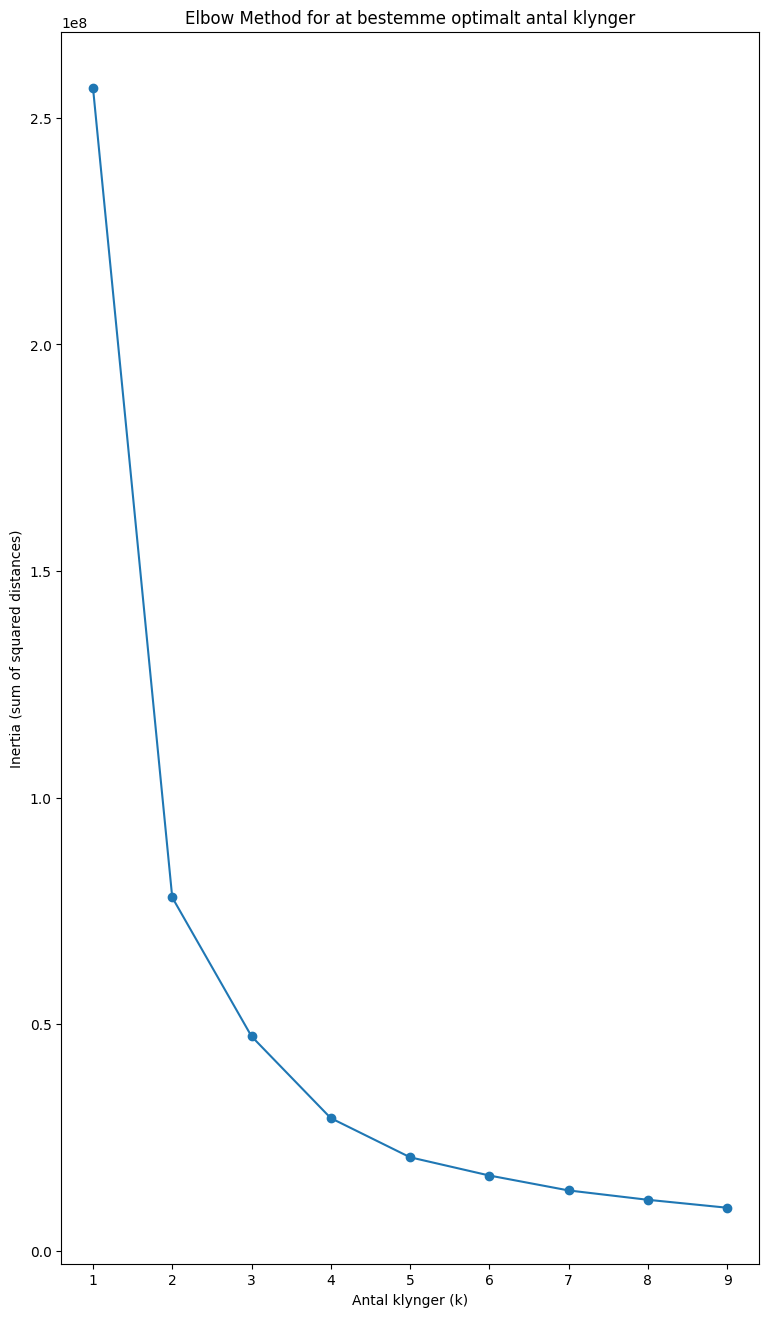

In [30]:
# ========== Code Cell for Step 28 ==========

from sklearn.cluster import KMeans

inertias = []
K_range = range(1, 10)  # fx 1 til 9 klynger

for k in K_range:
    kmeans = KMeans(n_clusters=k, n_init=10)  # n_init=10 for gentagelse
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plot "Elbow"
plt.figure(figsize=(9, 16))  # 9:16 aspect ratio
plt.plot(K_range, inertias, marker='o')
plt.title("Elbow Method for at bestemme optimalt antal klynger")
plt.xlabel("Antal klynger (k)")
plt.ylabel("Inertia (sum of squared distances)")
plt.show()

# Typisk leder man efter knækket ('the elbow') i kurven,
# hvor inertien ikke længere falder markant ved at øge k.


Opgave 29:
Byg et multilayer neural network (MLP) på breast cancer-datasættet (fra sklearn).
Sammenlign resultatet med f.eks. Logistic Regression.



In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np

# --------------------------------------------------
# 1. Load & forbered data
# --------------------------------------------------

data = load_breast_cancer()
X = data.data
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# --------------------------------------------------
# 2. Model – MLP
# --------------------------------------------------

class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(X.shape[1], 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.layers(x)

model = MLP()

# --------------------------------------------------
# 3. Træning
# --------------------------------------------------

loss_fn = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(100):
    model.train()
    y_pred = model(X_train_tensor)
    loss = loss_fn(y_pred, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# --------------------------------------------------
# 4. Evaluering
# --------------------------------------------------

model.eval()
with torch.no_grad():
    y_pred_test = model(X_test_tensor)
    y_pred_labels = (y_pred_test >= 0.5).int()
    acc = accuracy_score(y_test_tensor, y_pred_labels)
    print(f"Accuracy (MLP): {acc:.2%}")


Epoch 0, Loss: 0.6731
Epoch 10, Loss: 0.5632
Epoch 20, Loss: 0.4337
Epoch 30, Loss: 0.2930
Epoch 40, Loss: 0.1878
Epoch 50, Loss: 0.1267
Epoch 60, Loss: 0.0985
Epoch 70, Loss: 0.0822
Epoch 80, Loss: 0.0696
Epoch 90, Loss: 0.0620
Accuracy (MLP): 94.74%


Opgave 30:
Byg et multilayer neural network (CNN) på PetFinder-billeder
Brug inspiration fra bogen (Kap. 13 + MNIST-eksempler)

In [ ]:
# ========== PetFinder CNN – PyTorch uden transfer learning ==========

import os
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# --------------------------------------------------
# 1. Indstillinger
# --------------------------------------------------

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"✅ Device in use: {device}")
if device.type == 'cuda':
    print(f"Using GPU: {torch.cuda.get_device_name(0)}")
else:
    print("⚠️  CUDA not available. Running on CPU.")

IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 10

IMG_DIR = r"C:\Users\nour\Desktop\AI-projekt\PetFinder\train"
CSV_PATH = r"C:\Users\nour\Desktop\AI-projekt\PetFinder\train.csv"

# --------------------------------------------------
# 2. Dataset
# --------------------------------------------------

class PetFinderDataset(Dataset):
    def __init__(self, dataframe, img_dir, transform=None):
        self.df = dataframe.reset_index(drop=True)
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img_path = os.path.join(self.img_dir, row["Id"] + ".jpg")
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        label = torch.tensor(row["Pawpularity"] / 100.0, dtype=torch.float32)  # regression 0–1
        return image, label

# --------------------------------------------------
# 3. Dataforberedelse
# --------------------------------------------------

df = pd.read_csv(CSV_PATH)
df = df[df["Id"].apply(lambda f: os.path.exists(os.path.join(IMG_DIR, f + ".jpg")))]

train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])  # Tilpasset normalisering
])

train_ds = PetFinderDataset(train_df, IMG_DIR, transform)
val_ds = PetFinderDataset(val_df, IMG_DIR, transform)

train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=BATCH_SIZE)

# --------------------------------------------------
# 4. Klassisk CNN-model
# --------------------------------------------------

class PetFinderCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 128, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(128 * 28 * 28, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 1),
            nn.Sigmoid()  # Skaleret mellem 0–1
        )

    def forward(self, x):
        return self.model(x)

model = PetFinderCNN().to(device)

# --------------------------------------------------
# 5. Træning
# --------------------------------------------------

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

train_losses, val_losses = [], []

for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    for x, y in train_loader:
        x, y = x.to(device), y.to(device).unsqueeze(1)
        optimizer.zero_grad()
        y_hat = model(x)
        loss = criterion(y_hat, y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * x.size(0)
    train_losses.append(total_loss / len(train_loader.dataset))

    # Validering
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for x, y in val_loader:
            x, y = x.to(device), y.to(device).unsqueeze(1)
            y_hat = model(x)
            loss = criterion(y_hat, y)
            val_loss += loss.item() * x.size(0)
    val_losses.append(val_loss / len(val_loader.dataset))

    print(f"Epoch {epoch+1}/{EPOCHS} - Train Loss: {train_losses[-1]:.4f} - Val Loss: {val_losses[-1]:.4f}")

# --------------------------------------------------
# 6. Visualisering
# --------------------------------------------------

plt.figure(figsize=(10, 6))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Træningskurve – CNN Regression")
plt.legend()
plt.show()


Opgave 31, hvor vi bygger videre på CNN fra opgave 30 og tilføjer:

✅ BatchNorm
✅ Dropout
✅ L2 Regularisering
✅ Learning rate tuning
✅ Automatisk EarlyStopping
✅ Træningsgraf

In [ ]:
# ========== PetFinder CNN – Opgave 31 (med kapitel 13 elementer) ==========

import os
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# --------------------------------------------------
# 1. Indstillinger
# --------------------------------------------------

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 50

IMG_DIR = r"C:\Users\nour\Desktop\AI-projekt\PetFinder\train"
CSV_PATH = r"C:\Users\nour\Desktop\AI-projekt\PetFinder\train.csv"

# --------------------------------------------------
# 2. Dataset
# --------------------------------------------------

class PetFinderDataset(Dataset):
    def __init__(self, dataframe, img_dir, transform=None):
        self.df = dataframe.reset_index(drop=True)
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img_path = os.path.join(self.img_dir, row["Id"] + ".jpg")
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        label = torch.tensor(row["Pawpularity"] / 100.0, dtype=torch.float32)
        return image, label

# --------------------------------------------------
# 3. Dataforberedelse
# --------------------------------------------------

df = pd.read_csv(CSV_PATH)
df = df[df["Id"].apply(lambda f: os.path.exists(os.path.join(IMG_DIR, f + ".jpg")))]

train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

train_ds = PetFinderDataset(train_df, IMG_DIR, transform)
val_ds = PetFinderDataset(val_df, IMG_DIR, transform)

train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=BATCH_SIZE)

# --------------------------------------------------
# 4. CNN Model med BatchNorm + Dropout
# --------------------------------------------------

class PetFinderCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(128 * 28 * 28, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

model = PetFinderCNN().to(device)

# --------------------------------------------------
# 5. Loss, optimizer med L2 (weight_decay), EarlyStopping setup
# --------------------------------------------------

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

best_val_loss = float('inf')
patience = 5
counter = 0

train_losses, val_losses = [], []

# --------------------------------------------------
# 6. Træningsloop med EarlyStopping
# --------------------------------------------------

for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    for x, y in train_loader:
        x, y = x.to(device), y.to(device).unsqueeze(1)
        optimizer.zero_grad()
        y_hat = model(x)
        loss = criterion(y_hat, y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * x.size(0)
    train_loss = total_loss / len(train_loader.dataset)
    train_losses.append(train_loss)

    # Validering
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for x, y in val_loader:
            x, y = x.to(device), y.to(device).unsqueeze(1)
            y_hat = model(x)
            loss = criterion(y_hat, y)
            val_loss += loss.item() * x.size(0)
    val_loss /= len(val_loader.dataset)
    val_losses.append(val_loss)

    print(f"Epoch {epoch+1} — Train Loss: {train_loss:.4f} — Val Loss: {val_loss:.4f}")

    # EarlyStopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        counter = 0
        best_model_wts = model.state_dict()
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping activated!")
            model.load_state_dict(best_model_wts)
            break

# --------------------------------------------------
# 7. Visualisering af træning
# --------------------------------------------------

plt.figure(figsize=(10, 6))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Træningskurve – CNN med kapitel 13 features")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# ========== PetFinder CNN – Opgave 31 (med kapitel 13 elementer) ==========

import os
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# --------------------------------------------------
# 1. Indstillinger
# --------------------------------------------------

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 50

IMG_DIR = r"C:\Users\nour\Desktop\AI-projekt\PetFinder\train"
CSV_PATH = r"C:\Users\nour\Desktop\AI-projekt\PetFinder\train.csv"

# --------------------------------------------------
# 2. Dataset
# --------------------------------------------------

class PetFinderDataset(Dataset):
    def __init__(self, dataframe, img_dir, transform=None):
        self.df = dataframe.reset_index(drop=True)
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img_path = os.path.join(self.img_dir, row["Id"] + ".jpg")
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        label = torch.tensor(row["Pawpularity"] / 100.0, dtype=torch.float32)
        return image, label

# --------------------------------------------------
# 3. Dataforberedelse
# --------------------------------------------------

df = pd.read_csv(CSV_PATH)
df = df[df["Id"].apply(lambda f: os.path.exists(os.path.join(IMG_DIR, f + ".jpg")))]

train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

train_ds = PetFinderDataset(train_df, IMG_DIR, transform)
val_ds = PetFinderDataset(val_df, IMG_DIR, transform)

train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=BATCH_SIZE)

# --------------------------------------------------
# 4. CNN Model med BatchNorm + Dropout
# --------------------------------------------------

class PetFinderCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(128 * 28 * 28, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

model = PetFinderCNN().to(device)

# --------------------------------------------------
# 5. Loss, optimizer med L2 (weight_decay), EarlyStopping setup
# --------------------------------------------------

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

best_val_loss = float('inf')
patience = 5
counter = 0

train_losses, val_losses = [], []

# --------------------------------------------------
# 6. Træningsloop med EarlyStopping
# --------------------------------------------------

for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    for x, y in train_loader:
        x, y = x.to(device), y.to(device).unsqueeze(1)
        optimizer.zero_grad()
        y_hat = model(x)
        loss = criterion(y_hat, y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * x.size(0)
    train_loss = total_loss / len(train_loader.dataset)
    train_losses.append(train_loss)

    # Validering
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for x, y in val_loader:
            x, y = x.to(device), y.to(device).unsqueeze(1)
            y_hat = model(x)
            loss = criterion(y_hat, y)
            val_loss += loss.item() * x.size(0)
    val_loss /= len(val_loader.dataset)
    val_losses.append(val_loss)

    print(f"Epoch {epoch+1} — Train Loss: {train_loss:.4f} — Val Loss: {val_loss:.4f}")

    # EarlyStopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        counter = 0
        best_model_wts = model.state_dict()
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping activated!")
            model.load_state_dict(best_model_wts)
            break

# --------------------------------------------------
# 7. Visualisering af træning
# --------------------------------------------------

plt.figure(figsize=(10, 6))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Træningskurve – CNN med kapitel 13 features")
plt.legend()
plt.grid(True)
plt.show()


#  Opgave 33: Kat vs Hund klassifikation med CNN (PyTorch)

I denne opgave skal vi bygge et Convolutional Neural Network (CNN) for at afgøre, om et billede indeholder en **hund** eller en **kat**. Vi bruger billederne fra `train`-mappen og bygger modellen med **PyTorch**.

In [ ]:
import os
import pandas as pd
from torch.utils.data import Dataset
from torchvision.datasets.folder import default_loader

class PetDataset(Dataset):
    def __init__(self, csv_path, image_dir, label_map, transform=None):
        self.df = pd.read_csv(csv_path)
        self.image_dir = image_dir
        self.label_map = label_map
        self.transform = transform
        self.data = self.df[self.df["Id"].isin(label_map.keys())]

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        img_id = row["Id"]
        label = self.label_map[img_id]
        path = os.path.join(self.image_dir, img_id + ".jpg")
        image = default_loader(path)
        if self.transform:
            image = self.transform(image)
        return image, label
    

In [ ]:
label_map = {
    "00a1e0c0f89ff89a8f32d42e9025f6b2": 0,  # cat
    "00c7b596627da7425b624d6b16c88a25": 1,  # dog
    "00ad637daed96f77b6ec91db493dfed0": 1,
    "00d506ebe5eb12450eb530a2c96d08a3": 0,
    "00b151a572c9aabedf8cfce0fa18be25": 1,
    "00dc7582935fb2c862e751e2b5d4f5f0": 0
}

In [ ]:
from torchvision import transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

dataset = PetDataset("train.csv", "train", label_map, transform=transform)
train_loader = DataLoader(dataset, batch_size=8, shuffle=True)



In [ ]:
import torch
import torch.nn as nn

class PetCNN(nn.Module):
    def __init__(self):
        super(PetCNN, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 32 * 32, 128),
            nn.ReLU(),
            nn.Dropout(0.25),
            nn.Linear(128, 2)
        )

    def forward(self, x):
        x = self.conv(x)
        return self.fc(x)
    

In [ ]:
model = PetCNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(5):
    total_loss = 0
    for images, labels in train_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}: Loss = {total_loss:.4f}")
    

Epoch 1: Loss = 0.6769
Epoch 2: Loss = 0.5116
Epoch 3: Loss = 0.0201
Epoch 4: Loss = 0.0015
Epoch 5: Loss = 0.0022


In [ ]:
from PIL import Image

def predict_image(path, model):
    image = Image.open(path).convert("RGB")
    image = transform(image).unsqueeze(0)
    output = model(image)
    _, predicted = torch.max(output, 1)
    return "cat" if predicted.item() == 0 else "dog"

# Eksempel:
print(predict_image("train/00a1e0c0f89ff89a8f32d42e9025f6b2.jpg", model))


cat
